### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../..')
import cortexetl as c_etl
import shared_functions as sf

outdir = "/gpfs/bbp.cscs.ch/project/proj83/home/isbister/spike_sorting_bias_output_data/comparison/"
import os; os.makedirs(outdir, exist_ok=True)

### Load ETL Analyzers (Ground truth & Spike sorters)

In [ ]:
ground_ma = c_etl.analysis_initial_processing("/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortexetl.configs/post_physiology_2023/campaigns/spikesorting_stimulus_tests/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids.yaml") # , loglevel="ERROR"
ground_a = ground_ma.hex0_spikes

sorted_ma = c_etl.analysis_initial_processing("/gpfs/bbp.cscs.ch/project/proj147/home/isbister/experimental_data/1_silico_spike_sorting/etl_configs/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids/SortingKS3/4_spikesorting_stimulus_test_neuropixels_8-1-24__8slc_80f_360r_50t_200ms_1_smallest_fiber_gids_SortingKS3.yaml", create_figure_dirs=False) # loglevel="ERROR", 
sorted_a = sorted_ma.spikes

### Load processed custom dfs (stats with rotation info)

In [ ]:
import pickle
with open('/gpfs/bbp.cscs.ch/project/proj83/home/isbister/spike_sorting_bias_output_data/pickles/pickles_20-4-24/data_with_rotation_info_simulation_spikes.pickle', 'rb') as handle:
    ground_data_with_rotation_info = pickle.load(handle)

with open('/gpfs/bbp.cscs.ch/project/proj83/home/isbister/spike_sorting_bias_output_data/pickles/pickles_20-4-24/data_with_rotation_info_spike_sorted.pickle', 'rb') as handle:
    sorted_data_with_rotation_info = pickle.load(handle)

In [ ]:
print(sorted_data_with_rotation_info)

### Load df with prob of each ground truth unit being one of the spike sorted units

In [ ]:
import pandas as pd
sorted_unit_prob_for_each_ground_truth_gid = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/for_James/unit_matching.csv').rename(columns={"Unnamed: 0": "true_gid"})
postprocessed_ss_ids = [48, 51, 61, 106, 130, 132, 166, 181, 189, 236, 240, 248, 261, 274, 316, 321, 326, 382, 400, 406, 407, 408, 409, 417, 418, 419, 421, 422, 437, 439, 440, 442, 448, 449, 453, 454, 455, 456, 457, 458, 461, 462, 467, 468, 469, 479, 480, 482, 485, 486, 496, 497, 501, 504, 505, 508, 513, 531, 533, 536, 539, 542, 548, 549, 551, 558, 562, 563, 564, 567, 568, 569, 570, 574, 575, 576, 577, 578, 579, 580, 581, 582, 584, 595, 596, 598, 599, 606, 607, 611, 614, 619, 623, 636, 638, 639, 641, 642, 643, 644, 648, 649, 653, 657, 658, 659, 671, 672, 687, 688, 695, 707, 714, 716, 718, 719, 721, 725, 727, 732, 747, 758, 762, 771, 772, 794, 796, 800, 801, 811, 812, 821, 830, 831, 842, 846, 851, 853, 857, 864, 866, 868, 874, 877, 881, 882, 884, 889, 904, 905, 906, 907, 910, 911, 912, 913, 917, 929, 930, 931, 932, 941, 942, 943, 944, 945, 946, 950, 957, 961, 963, 965, 966, 967, 968, 969, 970, 977, 978, 979, 991, 998, 1011, 1021, 1023, 1024, 1030, 1034, 1051, 1060, 1061, 1065, 1066, 1067, 1073, 1077, 1078, 1110, 1117, 1127, 1137, 1139, 1141, 1144, 1151, 1154, 1155, 1157, 1165, 1178, 1179, 1182, 1184, 1186, 1199, 1200, 1201, 1204, 1206, 1208, 1209, 1213, 1223, 1224, 1241, 1246, 1249, 1256, 1257, 1259, 1270, 1271, 1280, 1282, 1290, 1293, 1295, 1296, 1298, 1299, 1301, 1303, 1308, 1309, 1310, 1316, 1320, 1322, 1328, 1329, 1342, 1346, 1347, 1348, 1356, 1358, 1361, 1363, 1368, 1370, 1376, 1377, 1378, 1380, 1381, 1391, 1394, 1395, 1403, 1407, 1413, 1418, 1419, 1420, 1426, 1428, 1431, 1433, 1434, 1436, 1439, 1442, 1444, 1448, 1453, 1459, 1479, 1480, 1485, 1498, 1500, 1504, 1512, 1515, 1528, 1532, 1533, 1535, 1536, 1538, 1539, 1543, 1544, 1546, 1552, 1561, 1566, 1570, 1577, 1579, 1580, 1597, 1601, 1605, 1608, 1609, 1615, 1620, 1632, 1637, 1644, 1646, 1652, 1654, 1659, 1660, 1663, 1664, 1668, 1671, 1678, 1679, 1681, 1682, 1683, 1685, 1690, 1691, 1722, 1723, 1725, 1737, 1738, 1740, 1751, 1762, 1763, 1764, 1765, 1768, 1771, 1776, 1777, 1780, 1791, 1796, 1801, 1817, 1820, 1831, 1846, 1854, 1855, 1856, 1858, 1863, 1868, 1874, 1875, 1890, 1891, 1897, 1905, 1913, 1915, 1947, 1954, 1958, 1978, 1992, 1997, 2001, 2003, 2012, 2013, 2015, 2026, 2028, 2049, 2053, 2072, 2073, 2080, 2081, 2096, 2100, 2115, 2116, 2122, 2123, 2148, 2154, 2156, 2160, 2161, 2170, 2179, 2203, 2208, 2237, 2253, 2256, 2293, 2300, 2310, 2342, 2374, 2384, 2386, 2401, 2411, 2414, 2426, 2442, 2445, 2473, 2479, 2510, 2571, 2585, 2604, 2616, 2622]
postprocessed_ss_ids_str = ['true_gid'] + [str(gid) for gid in postprocessed_ss_ids]
sorted_unit_prob_for_each_ground_truth_gid = sorted_unit_prob_for_each_ground_truth_gid.loc[:, postprocessed_ss_ids_str]
ground_truth_gids = np.asarray(sorted_unit_prob_for_each_ground_truth_gid['true_gid'])

### Figure Helper

In [ ]:
def remove_intermediate_axis_labels(ax, y_or_x='x'):
    
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ticks = ax.get_xticks()
    if y_or_x == 'y':
        labels = [item.get_text() for item in ax.get_yticklabels()]
        ticks = ax.get_yticks() 
    
    num_labels = len(labels)
    for i in range(1, num_labels-1):
        labels[i] = ''
        
    if y_or_x == 'x': ax.set_xticks(ticks, labels)
    if y_or_x == 'y': ax.set_yticks(ticks, labels)

### Plot histogram of highest agreement scores 

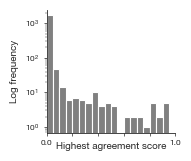

In [160]:
ss_probs = sorted_unit_prob_for_each_ground_truth_gid.iloc[:, 1:].to_numpy()
highest_prob_for_each_sorted_unit = ss_probs.max(axis=1)

plt.figure(figsize=(2.0, 1.7))
plt.hist(highest_prob_for_each_sorted_unit, bins=np.arange(0.0, 1.0, 0.05), log=True, color='grey')
plt.gca().set_xlim([0.0, 1.0])
# plt.gca().set_title('Highest agreement scores')
plt.gca().set_ylabel('Log frequency')
plt.gca().set_xlabel('Highest agreement score', labelpad=-3)
remove_intermediate_axis_labels(plt.gca(), y_or_x='x')
plt.tight_layout()
plt.savefig(outdir + 'agreement_score.pdf')
plt.show()
plt.close()

### Tuning curve stats

In [60]:
from sklearn.metrics import mean_squared_error
import math
def tuning_curve_analysis(features, stat_key, nspiking_rotations_threshold=20, mean_firing_rate_threshold=0.1):

    dicts = []
    for gid in np.unique(features['gid']):

        gid_features_df = features.etl.q(gid=gid).copy()
        gid_features_df.sort_values(by=['rotation'], inplace=True)
        
        r = np.asarray(gid_features_df[stat_key])
        where_non_zero = np.argwhere(r > 0.1).flatten()
        r_nonzero = r[where_non_zero]
        nspiking_rotations = len(r_nonzero)
        
        snr = np.nan
        theta = np.nan
        mean_x_component = np.nan
        mean_y_component = np.nan
        mean_angle = np.nan
        mean_r_nonzero = np.nan
        std_r_nonzero = np.nan
        if nspiking_rotations > nspiking_rotations_threshold:
            theta = gid_features_df.iloc[where_non_zero]['rotation_radians']
            x_components = r_nonzero * np.cos(theta)
            y_components = r_nonzero * np.sin(theta)
            mean_x_component = x_components.mean()
            mean_y_component = y_components.mean()
            mean_angle = np.arctan2(mean_y_component, mean_x_component)
            mean_r_nonzero = math.sqrt(mean_x_component**2 + mean_y_component**2)
            std_r_nonzero = np.std(r_nonzero)
            snr = np.var(r_nonzero) / (np.mean(r_nonzero)**2)
        
        neighbour_rotation_error = np.nan
        r0s = []; r1s = []
        for i in range(len(r)):
            if (i < len(r) - 1):
                if (r[i] > 0.1) & (r[i + 1] > 0.1):
                    r0s.append(r[i])
                    r1s.append(r[i+1])
        if len(r0s) > 5:
            neighbour_rotation_error = mean_squared_error(r0s, r1s)
    
        dicts.append({'gid': gid, 
                      'nspiking_rotations': nspiking_rotations,
                      'snr': snr, 
                      'mean_x_component': mean_x_component, 
                      'mean_y_component': mean_y_component, 
                      'mean_angle': mean_angle, 
                      'mean_r_nonzero': mean_r_nonzero, 
                      'std_r_nonzero': std_r_nonzero, 
                      'neighbour_rotation_error': neighbour_rotation_error}) 
 
    return pd.DataFrame.from_records(dicts)
    
    
gt_features = ground_data_with_rotation_info["features_by_gid_rotation_windows"].etl.q(gid=np.asarray(sorted_unit_prob_for_each_ground_truth_gid['true_gid']))  
ss_features = sorted_data_with_rotation_info["features_by_gid_rotation_windows"].etl.q(gid=postprocessed_ss_ids)    

gt_tuning_df = tuning_curve_analysis(gt_features, "mean_spike_counts", nspiking_rotations_threshold=20, mean_firing_rate_threshold=0.1)   
ss_tuning_df = tuning_curve_analysis(ss_features, "mean_spike_counts", nspiking_rotations_threshold=20, mean_firing_rate_threshold=0.1)

gt_tuning_no_threshold_df = tuning_curve_analysis(gt_features, "mean_spike_counts", nspiking_rotations_threshold=2, mean_firing_rate_threshold=0.0) 

### Histogram of ground truth vs sorted histogram stats

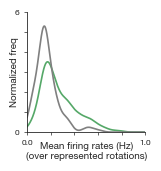

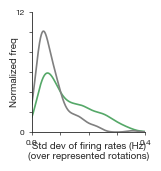

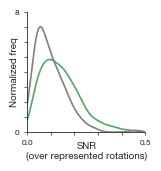

In [203]:
import scipy.stats as stats

xlabels_for_tuning_key = {
#     "mean_r_nonzero": "Single neuron mean (over rotations) of\ntrial-averaged firing rates (>0.1Hz)",
    "mean_r_nonzero": "Mean firing rates (Hz)\n(over represented rotations)",
    "snr": "SNR\n(over represented rotations)",
    "std_r_nonzero": "Std dev of firing rates (Hz)\n(over represented rotations)",
    "neighbour_rotation_error": "Neighbour rotation difference"
    
}

def plot_tuning_histograms(gt_tuning_df, ss_tuning_df, tuning_key, xmax):

    plt.figure()

    gt_density = stats.gaussian_kde(gt_tuning_df[tuning_key][np.logical_not(np.isnan(gt_tuning_df[tuning_key]))])
    n, gt_x, _ = plt.hist(gt_tuning_df[tuning_key], bins=np.linspace(0, xmax, 1000), 
                       histtype=u'step', density=True)
    ss_density = stats.gaussian_kde(ss_tuning_df[tuning_key][np.logical_not(np.isnan(ss_tuning_df[tuning_key]))])
    n, ss_x, _ = plt.hist(ss_tuning_df[tuning_key], bins=np.linspace(0, xmax, 1000), 
                       histtype=u'step', density=True)
#     plt.show()
    plt.close()

    plt.figure(figsize=(1.7, 1.8))
    plt.plot(gt_x, gt_density(gt_x), c='g')
    plt.plot(ss_x, ss_density(ss_x), c='grey')
    plt.gca().set_xlim([0.0, xmax])
    plt.gca().set_ylim([0.0, np.max([np.max(gt_density(gt_x)), np.max(ss_density(ss_x))])*1.05])
    remove_intermediate_axis_labels(plt.gca(), y_or_x='x')
    remove_intermediate_axis_labels(plt.gca(), y_or_x='y')
    plt.gca().set_xlabel(xlabels_for_tuning_key[tuning_key], labelpad=-3)
    plt.gca().set_ylabel("Normalized freq", labelpad=-3)
    plt.tight_layout()
    plt.savefig(outdir + tuning_key + '.pdf')
    plt.show()
    plt.close()
    
plot_tuning_histograms(gt_tuning_df, ss_tuning_df, 'mean_r_nonzero', 1.0)
plot_tuning_histograms(gt_tuning_df, ss_tuning_df, 'std_r_nonzero', 0.4)
plot_tuning_histograms(gt_tuning_df, ss_tuning_df, 'snr', 0.5)

# plot_tuning_histograms(gt_tuning_df, ss_tuning_df, 'neighbour_rotation_error', 0.015)

### Polar tuning curve plots + stats scatters

In [ ]:
# import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.linalg import norm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib import ticker as mticker

def empty_label_formatter(x, pos):
    return ""  # Return an empty string for no label

def polar_tuning_curve_plots(gt_features, ss_features, gt_tuning_df, ss_tuning_df, stat_key, high_spike_count_threshold=0.2, ntrials_above_high_spike_count_threshold=20, similarity_prob_threshold=0.05, outdir=''):

    figsize = (2., 3.)
#     figsize = (4, 4)
    s = .2
    gt_c = 'g'
    ss_c = 'grey'
    os.makedirs(outdir, exist_ok=True)
    filenames = []
        
    all_cosine_similarities = []
    all_highest_probs = []
    all_mean_r_props = []
    all_positive_angle_differences = []
        
    for gid in np.unique(gt_features['gid']):

        gt_gid_features_df = gt_features.etl.q(gid=gid).copy()
        
        high_spike_count_trials_gt_gid_features_df = gt_gid_features_df[gt_gid_features_df['mean_spike_counts'] > high_spike_count_threshold] 
        gt_gid_features_df.sort_values(by=['rotation'], inplace=True)

        ss_probs = sorted_unit_prob_for_each_ground_truth_gid.etl.q(true_gid=gid).iloc[0, 1:]
        highest_prob_ss_id = ss_probs.idxmax()
        highest_prob = ss_probs.loc[highest_prob_ss_id]
        ss_df = ss_features.etl.q(gid=int(highest_prob_ss_id))
        
        r = gt_gid_features_df[stat_key]
        theta = gt_gid_features_df['rotation_radians']
        gt_tuning_row = gt_tuning_df.etl.q(gid=gid).iloc[0]
        

        ss_tuning_single = ss_tuning_df.etl.q(gid=int(highest_prob_ss_id))
    
        if (len(high_spike_count_trials_gt_gid_features_df) > ntrials_above_high_spike_count_threshold) & (highest_prob > similarity_prob_threshold):
#         if len(ss_tuning_single):
            ss_tuning_row = ss_tuning_single.iloc[0]
            A = [gt_tuning_row['mean_x_component'], gt_tuning_row['mean_y_component']]
            B = [ss_tuning_row['mean_x_component'], ss_tuning_row['mean_y_component']]
            cosine_similarity = np.dot(A,B)/(norm(A)*norm(B))
            all_highest_probs.append(highest_prob)
            all_cosine_similarities.append(cosine_similarity)
            all_mean_r_props.append(ss_tuning_row['mean_r_nonzero'] / gt_tuning_row['mean_r_nonzero'])
            all_positive_angle_differences.append(math.sqrt((np.rad2deg(ss_tuning_row['mean_angle'] - gt_tuning_row['mean_angle']))**2))

        draw_individual = True
        if draw_individual:
            if (len(high_spike_count_trials_gt_gid_features_df) > ntrials_above_high_spike_count_threshold) & (highest_prob > similarity_prob_threshold):

                ss_r = ss_df[stat_key]
                ss_theta = ss_df['rotation_radians']
                
                fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=figsize)

                # GROUND TRUTH POINTS
                gt_p = ax.scatter(theta, r, s=s, c=gt_c, label='Silico')

                # SPIKE SORTED POINTS
                ss_p = ax.scatter(ss_theta, ss_r, s=s, c=ss_c, label='Kilsort 3', alpha=0.7)

                # GROUNT TRUTH MEAN VECTOR
#                 print(gt_tuning_row['mean_angle'])
                ax.plot([0.0, gt_tuning_row['mean_angle']], [0.0, gt_tuning_row['mean_r_nonzero']], c=gt_c, lw=1.0)

                # SPIKE SORTED MEAN VECTOR
                if len(ss_tuning_single):
                    ax.plot([0.0, ss_tuning_row['mean_angle']], [0.0, ss_tuning_row['mean_r_nonzero']], c=ss_c, alpha=0.7) #, lw=1.0

                # PLOT OPTIONS
                border_color = 'black'
                ax.set_rticks([0.25, 0.5, 0.75, 1.0])
                ax.set_rmax(1.0)
                ax.tick_params(axis='x', pad=-2)
                ax.grid(which='major', color='grey', linewidth = .5)
#                 ax.grid(which='minor', color='yellow', linewidth = .5)
                ax.spines['polar'].set_color(border_color)
#                 ax.grid(linewidth = .5)
                ax.set_yticklabels([])
                ax.set_title("Agreemement: %.3f" % highest_prob, va='bottom', y=-0.3)
                
                
                line = Line2D([0], [0], color=border_color, label='1Hz', lw=.7)
                plt.legend(handles=[gt_p, ss_p, line], frameon=False, bbox_to_anchor=(1.3, 1.4))
                
                plt.tight_layout()
                filename = outdir + str(gid) + '.png'
                filenames.append(filename)
                plt.savefig(filename, dpi=300)

                filename_pdf = outdir + str(gid) + '.pdf'
                plt.savefig(filename_pdf)
#                 plt.show()
                plt.close()
                
#                 break
    c_etl.video_from_image_files(filenames, outdir + stat_key + '.mp4', delete_images=True)

    plt.figure(figsize=(2.0, 1.7))
    plt.scatter(all_highest_probs, all_positive_angle_differences, s=0.2, c='gold')
    plt.plot([0.0, 1.0], [1.0, 1.0], c='grey', lw=0.5, zorder=-3)
    plt.gca().set_xlim([0.0, 1.0])
    plt.gca().set_yscale('log')
    plt.gca().set_xlabel("Similarity score", labelpad=-3)
    plt.gca().set_ylabel("Preference error (degrees)", labelpad=0)
    remove_intermediate_axis_labels(plt.gca(), y_or_x='x')
    plt.tight_layout()
    plt.savefig(outdir + 'preference_error.pdf')
    plt.show()
    plt.close()
    
    plt.figure(figsize=(2.0, 1.7))
    plt.scatter(all_highest_probs, all_mean_r_props, s=0.2, c='gold')
    plt.plot([0.0, 1.0], [1.0, 1.0], c='grey', lw=0.5, zorder=-3)
    plt.gca().set_xlim([0.0, 1.0])
    plt.gca().set_yscale('log')
    plt.gca().set_xlabel("Similarity score", labelpad=-3)
    plt.gca().set_ylabel("Firing rate proportion")
    plt.gca().set_xlim([0.0, 1.0])
    remove_intermediate_axis_labels(plt.gca(), y_or_x='x')
    plt.tight_layout()
    plt.savefig(outdir + 'firing_rate_proportion.pdf')
    plt.show()
    plt.close()
    
    
    plt.figure(figsize=(2.0, 1.85))
    plt.scatter(all_positive_angle_differences, all_mean_r_props, s=0.2, c='gold')
    plt.gca().set_xscale('log')
    plt.gca().set_yscale('log')
    plt.gca().xaxis.set_major_locator(mticker.LogLocator(numticks=999))
    plt.gca().xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
    plt.gca().set_ylabel("Firing rate proportion")
    plt.gca().set_xlabel("Preference error (degrees)", labelpad=3)
    plt.tight_layout()
    plt.savefig(outdir + 'firing_rate_proportion_vs_preference_error.pdf')
    plt.show()
    plt.close()
    
    
#     plt.figure(figsize=(2, 2))
#     plt.scatter(all_highest_probs, all_cosine_similarities, s=0.2, c='gold')
#     plt.gca().set_xlabel("Similarity score")
#     plt.gca().set_ylabel("Cosine similarity")
#     plt.gca().set_xlim([0.0, 1.0])
#     plt.tight_layout()
#     plt.show()
#     plt.close()
    
#     plt.figure(figsize=(2, 2))
#     plt.hist(all_cosine_similarities)
#     plt.gca().set_xlabel("Cosine similarity")
#     plt.gca().set_ylabel("Frequency")
#     plt.tight_layout()
#     plt.show()
#     plt.close()
    
#     plt.figure(figsize=(2, 2))
#     plt.hist(all_mean_r_props, bins=np.arange(0.0, 40.0, 0.5))
#     plt.gca().set_xlabel("Firing rate proportion")
#     plt.gca().set_ylabel("Frequency")
#     plt.tight_layout()
#     plt.show()
#     plt.close()
        
gt_features = ground_data_with_rotation_info["features_by_spiking_gid_rotation_windows"].etl.q(gid=np.asarray(sorted_unit_prob_for_each_ground_truth_gid['true_gid']))
ss_features = sorted_data_with_rotation_info["features_by_spiking_gid_rotation_windows"].etl.q(gid=postprocessed_ss_ids)    
    
# polar_tuning_curve_plots(gt_features, ss_features, gt_tuning_df, ss_tuning_df, "first_spike_time_means_cort_zeroed", mean_spike_count_threshold=0.3, outdir=outdir + "/fs_tuning_curves/")
polar_tuning_curve_plots(gt_features, ss_features, gt_tuning_df, ss_tuning_df, "mean_spike_counts", high_spike_count_threshold=0.2, ntrials_above_high_spike_count_threshold=20, similarity_prob_threshold=-1.0, outdir=outdir + "/fr_tuning_curves/")



### New flat tuning curve plot

In [ ]:
gt_by_trial_features = ground_data_with_rotation_info["features_by_gid_and_trial_rotation_windows"].etl.q(gid=np.asarray(sorted_unit_prob_for_each_ground_truth_gid['true_gid']))
ss_by_trial_features = sorted_data_with_rotation_info["features_by_gid_and_trial_rotation_windows"].etl.q(gid=postprocessed_ss_ids)

for gid in gt_by_trial_features.gid.unique():
    gid_gt_by_trial_features = gt_by_trial_features.etl.q(gid=gid)
    #     print(gid_gt_by_trial_features)

    plt.figure()
    plt.scatter(gid_gt_by_trial_features.rotation, gid_gt_by_trial_features['count'])
    plt.show()
    plt.close()


In [33]:
hist = ground_a.features.histograms.df.reset_index().etl.q(window="evoked_SOZ_100ms", neuron_class="ALL", bin_size=1.0, smoothing_type='Gaussian', kernel_sd=1.0)

In [ ]:
ground_window_by_gid_and_trial = ground_a.features.by_gid_and_trial.df.etl.q(neuron_class='ALL', window="evoked_SOZ_100ms")
ss_window_by_gid_and_trial = ss_a.features.by_gid_and_trial.df.etl.q(neuron_class='ALL', window="evoked_SOZ_100ms")

In [ ]:
print(ground_window_by_gid_and_trial)

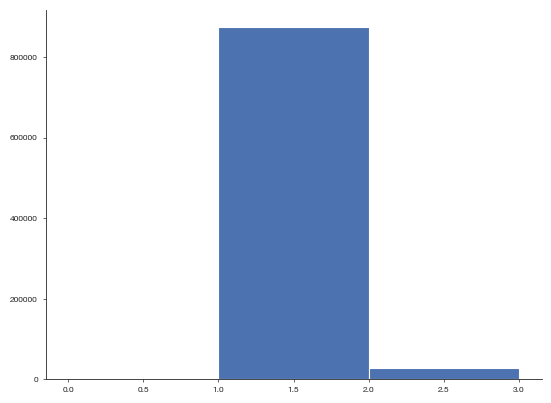

In [43]:
plt.figure()
plt.hist(window_by_gid_and_trial['count'][window_by_gid_and_trial['count'] != 0], bins=[0, 1, 2, 3])
plt.show()

In [ ]:
ids = postprocessed_ss_ids
analyzer = sorted_a
neuron_class = 'all'

ids = sorted_unit_prob_for_each_ground_truth_gid['true_gid']
analyzer = ground_a
neuron_class = 'ALL'


for window in analyzer.repo.windows.df.window.unique():
    if "evoked" in window:
        by_gid_and_trial = analyzer.features.by_gid_and_trial.df.etl.q(simulation_id=0, neuron_class=neuron_class, window=window)

        for gid in ids:
            gid_firsts = by_gid_and_trial.etl.q(gid=gid)['first']
            gid_firsts = gid_firsts[np.logical_not(np.isnan(gid_firsts))]
#             print(gid_firsts)
            if len(gid_firsts) > 10:
                plt.figure()
                plt.hist(gid_firsts.values, bins=np.arange(0.0, 25.0, 1.0))
                plt.show()
                plt.close()
                
                plt.figure()
                plt.scatter([i for i in range(len(gid_firsts))], gid_firsts.values)
                plt.show()
                plt.close()
            


1836
1652


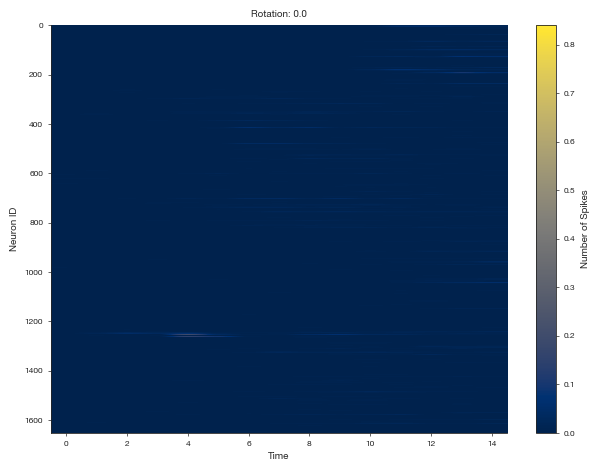

In [62]:
import matplotlib.pyplot as plt
def plot_trial_averaged_histos_by_rotation(data_with_rotation_info, tuning_df, gids=[], outdir='', make_pdfs=False, delete_images=True, figsize=(2, 2)):    

    os.makedirs(outdir, exist_ok=True)
    
    png_paths = []
    for rotation in data_with_rotation_info['uniq_rotations']:
        hist = data_with_rotation_info['trial_averaged_histograms'][rotation]
        
        sorted_ids = np.argsort(tuning_df['mean_angle'].to_numpy())
        sorted_gids = tuning_df['gid'].to_numpy()[sorted_ids]
#         sorted_angles = tuning_df['mean_angle'].to_numpy()[sorted_ids]
        
#         print(sorted_gids)
        
        if len(gids):
            _, _, filtered_hist_indices = np.intersect1d(gids, data_with_rotation_info['histogram_gids'], return_indices=True)
            filtered_gids = data_with_rotation_info['histogram_gids'][filtered_hist_indices]

            sorted_filtered_hist_indices = np.ones(len(sorted_gids), dtype=int)
            for hist_id, filtered_gid in enumerate(filtered_gids):
                sorting_index = np.argwhere(sorted_gids == filtered_gid).flatten()
                
                if len(sorting_index):
                    sorting_index = sorting_index[0]
                    sorted_filtered_hist_indices[sorting_index] = hist_id
                else:
                    print("do something extra")
                    # Do something extra
            print(len(sorted_filtered_hist_indices))
#             for i in sorted_filtered_hist_indices:
#                 print(i)
            print(len(np.unique(sorted_filtered_hist_indices)))
            hist = hist[filtered_hist_indices]

        fig, ax = plt.subplots() # figsize=figsize
        im = ax.imshow(hist, cmap='cividis', aspect='auto') # hot,  interpolation='nearest', 
        ax.set_title("Rotation: " + str(rotation))
        ax.set_xlabel('Time')
        ax.set_ylabel('Neuron ID')
        fig.colorbar(im, label='Number of Spikes')
        plt.tight_layout()
        
        png_path = outdir + str(int(rotation)) + '.png'
        png_paths.append(png_path)
        plt.savefig(png_path)
        
        if make_pdfs:
            pdf_path = outdir + str(int(rotation)) + '.pdf'
            plt.savefig(pdf_path)
            
        plt.show()
        plt.close()
        
        break
    
    c_etl.video_from_image_files(png_paths, outdir + 'all_rotations.mp4', delete_images=delete_images)
    
# plot_trial_averaged_histos_by_rotation(sorted_data_with_rotation_info, ss_tuning_df, gids=postprocessed_ss_ids, outdir=outdir + 'ss_hist/', make_pdfs=False, delete_images=True)
plot_trial_averaged_histos_by_rotation(ground_data_with_rotation_info, gt_tuning_no_threshold_df, gids=ground_truth_gids, outdir=outdir + 'gt_hist/', make_pdfs=False, delete_images=True)

In [ ]:
!sbatch batch_gpu_test.batch

In [208]:
!python plot_nn_training_ouptut.py

Traceback (most recent call last):
  File "/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortexetl.notebooks/spike_sorting/plot_nn_training_ouptut.py", line 8, in <module>
    pickle.load(file)
EOFError: Ran out of input


In [ ]:
sorted_data_with_rotation_info['histograms_by_rotation_and_trial'][0.0].shape

In [ ]:
ground_a.repo.neurons.df.etl.q(gid=np.asarray(sorted_unit_prob_for_each_ground_truth_gid['true_gid']))

cells_collection = list(ground_a.repo.simulations.df.iloc[0].circuit.nodes.values())[0]
cells_collection.available_properties
ground_truth_cells = cells_collection.get(ground_truth_gids)
simulated_cells = cells_collection.get(ground_a.repo.neurons.df.gid.unique())

import matplotlib.pyplot as plit
plt.figure()
plt.scatter(simulated_cells['x'], simulated_cells['y'])
plt.scatter(ground_truth_cells['x'], ground_truth_cells['y'])
plt.show()
plt.close()
# print(ground_truth_cells['x'])

# print(.get("x"))

In [ ]:
import conntility

# base_target = 'hex0'
print("Filtering circuit.")
load_cfg = {
    "loading": {
        "properties": ["x", "y", "z", "ss_flat_x", "ss_flat_y", "mtype", "etype", "layer", "morphology",
                      "synapse_class"]
    }
}
nrn = conntility.circuit_models.neuron_groups.load_filter(ground_a.repo.simulations.df.iloc[0].circuit, 
                                                          load_cfg)


### Misc raster

In [ ]:
sorted_spikes_full = sorted_a.repo.report.df.etl.q(window='w1', time={'le':2500}, gid=postprocessed_ss_ids)
gt_spikes_full = ground_a.repo.report.df.etl.q(window='full_sim', time={'ge':1000, 'le':3500}, simulation_id=0, gid=ground_truth_gids)

plt.figure(figsize=(20, 2))
plt.scatter(sorted_spikes_full['time'], sorted_spikes_full['gid'], s=.1)
plt.gca().set_ylabel('Neuron ID')
plt.gca().set_xlabel('Time (ms)')

plt.figure(figsize=(20, 2))
plt.scatter(gt_spikes_full['time'] - 1000.0, gt_spikes_full['gid'], s=.1)
plt.gca().set_ylabel('Neuron ID')
plt.gca().set_xlabel('Time (ms)')

### Misc

In [ ]:
# mean_spike_counts_full = np.asarray(sorted_a.features.by_gid.df.etl.q(window='w1')['mean_spike_counts'])
# plt.figure()
# plt.hist(mean_spike_counts_full, bins=np.arange(0, np.max(mean_spike_counts_full), 100))

# print(np.sum(mean_spike_counts_full < ))
# plt.figure()
# sorted_mfrs_full = np.asarray(sorted_a.features.by_gid.df.etl.q(window='w1')['mean_firing_rates_per_second'])
# print(np.sum(sorted_mfrs_full < 0.01))
# plt.hist(sorted_mfrs_full, bins=np.arange(0, np.max(sorted_mfrs_full), 0.1))

#             ax.arrow( 0.0, 0.0, mean_angle, mean_r, fc="k", ec="k", head_width=0.05, head_length=0.1)
#             prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8", shrinkA=0,shrinkB=0)
#             prop = {}
#             plt.annotate("", xy=(mean_angle,mean_r), xytext=(0,0), arrowprops=prop)